# WSI tile scoring and extraction script

## [deep-histopath](https://github.com/CODAIT/deep-histopath/blob/master/docs/wsi-preprocessing-in-python/index.md#tiles)

In [2]:
from deephistopath.wsi import tiles

ModuleNotFoundError: No module named 'deephistopath'

[![](https://warehouse-camo.ingress.cmh1.psfhosted.org/9911ea07db2d5bc14a5a55013c8e5fa0ffecad2f/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f343139363039312f38343832383233322d30343866636330302d623032362d313165612d386361612d3563313462623835363562642e706e67)](https://pypi.org/project/histolab/)
<!-- ## [histolab](https://pypi.org/project/histolab/)-->
#### For scoring, tiling and extraction:
> #### histolab is designed to handle WSIs, automatically detect the tissue, and retrieve informative tiles, and it can thus be integrated in a deep learning pipeline.

In [8]:
# pip install histolab

In [64]:
from histolab.slide import Slide

Exception ignored in: <function Scene.__del__ at 0x7fb51bf838b0>
Traceback (most recent call last):
  File "/Users/stevenhamel/opt/anaconda3/lib/python3.8/site-packages/slideio/py_slideio.py", line 32, in __del__
    if self.scene is not None:
AttributeError: 'Scene' object has no attribute 'scene'


# Py-WSI

In [ ]:
"""

A class for reading Whole-Slide Images

Author: @hamelst

"""
import py_wsi
import py_wsi.imagepy_toolkit as tk
import os
    
class WSI_reader:
    
    def __init__(self, image_dir=None, **kwargs ):
#         self.name = name
#         self.salary = salary

        # Make sure image directory given is correct 
        assert image_dir!=None, 'Please make first argument the path to a directory containing all of the svs images'
        assert os.path.isdir(image_dir), 'image_dir directory not found'
        
        # Set default values for arguments
        #    - To-do: add documentation in vein of https://github.com/ysbecca/py-wsi/blob/master/py_wsi/turtle.py
        options = { #default values
                'image_dir' : image_dir,
                'db_location' : './WSI_database/',
                'xml_dir' : None,
                'patch_size' : 512,
                'level' : 12,
                'db_name' : 'svs_DB',
                'overlap' : 0,
                'storage_format' : 'hdf5',
                'require_DB_path_exists' : False,
        }
        
        # update default values with values given in function
        options.update(kwargs)
        
        # Setup file directory
        if options['xml_dir'] == None:
            self.xml_dir = options['image_dir']
        else:
            self.xml_dir = options['xml_dir']
        
        
        
   


    def displayCount(self):
        print ("Total Employee %d" % Employee.empCount)

    def displayEmployee(self):
        print ("Name : ", self.name,  ", Salary: ", self.salary)

In [2]:
import py_wsi
import py_wsi.imagepy_toolkit as tk
import os

In [3]:
tissue = 'R1030'

file_dir = f"../../images/merad_lab_images/{tissue}/"
db_location = f"../../images/database/{tissue}/"
xml_dir = file_dir
patch_size = 512
level = 12
db_name = tissue+"_DB"
overlap = 0
storage_format = 'hdf5'



In [4]:
assert os.path.isdir(file_dir), str(file_dir)+" is not real directory. file_dir must be real directory"
os.makedirs(db_location, exist_ok=True)

In [5]:
turtle = py_wsi.Turtle(file_dir, db_location, db_name, xml_dir=xml_dir, storage_type=storage_format)

Storage type:               hdf5
Images directory:           ../../images/merad_lab_images/R1030/
Data store directory:       ../../images/database/R1030/
Images found:               5


In [6]:
dir(turtle)

['_Turtle__calculate_map_size',
 '_Turtle__check_file_found',
 '_Turtle__get_db_meta_name',
 '_Turtle__get_files_from_dir',
 '_Turtle__get_items_from_file',
 '_Turtle__get_patches_from_disk',
 '_Turtle__get_patches_from_hdf5',
 '_Turtle__items_to_patches_and_meta',
 '_Turtle__sample_store_disk',
 '_Turtle__sample_store_hdf5',
 '_Turtle__sample_store_lmdb',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'db_location',
 'db_meta_name',
 'db_name',
 'file_dir',
 'files',
 'get_patches_from_file',
 'get_set_patches',
 'get_xml_files',
 'label_map',
 'num_files',
 'retrieve_sample_patch',
 'retrieve_tile_dimensions',
 'sample_and_store_patches',
 'set_db_location',
 'set_d

In [7]:
turtle.files

array(['R1030T_CXCL9.svs', 'R1030N_HE.svs', 'R1030T_HE.svs',
       'R1030T_TCF1.svs', 'R1030Bx_CXCL9.svs'], dtype='<U17')

In [18]:
turtle.sample_and_store_patches(patch_size, 12, overlap, load_xml=False, limit_bounds=True)

R1030T_CXCL9.svs R1030N_HE.svs R1030T_HE.svs R1030T_TCF1.svs R1030Bx_CXCL9.svs Time usage: 0:00:42


In [34]:
sample_image = turtle.files[1]

In [36]:
#np array, 
x = turtle.get_patches_from_file(sample_image, verbose=True)


[py-wsi] loaded from R1030N_HE .h5 file (20, 512, 512, 3)


In [41]:
x[3]

[]

# slideIO

In [94]:
import os
working_directory = '/Users/stevenhamel/Dropbox/My Mac (Steven’s MacBook Pro (2))/Documents/Projects/qpath_unet'
os.chdir(working_directory)
import slideio
import matplotlib.pyplot as plt
slide = slideio.open_slide("images/merad_lab_images/R1030/R1030T_HE.svs", "SVS")
scene = slide.get_scene(0)
image = scene.read_block((5000,0,10000,5000), (0,0))

In [120]:
scene.size

(25896, 15638)

In [74]:
"""

A class for reading Whole-Slide Images

Author: @hamelst

"""

import os
import slideio
from pathlib import Path
from typing import Union #TYPE_CHECKING, Iterator, List, Tuple, 
import numpy as np

flatten = lambda *n: (e for a in n
    for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,)))

class Image:
    
    def __init__(self, image_path: Union[str, bytes, os.PathLike]=None,
                 image_type: Union[str, bytes, os.PathLike]=None) -> None:
        """
        inputs: 
            - `image_path`: can be string bytes or path object and represents a full or relative image path 
                Ex. "path/to/svs/image.svs"
            - `image_type`: image type according to format from slideio [given here](http://www.slideio.com/drivers.html)
                Ex. "SVS"
        """

        # Make sure image path is given and path is correct
        assert image_path!=None, 'Please make first argument the path to a Whole-Slide Image images'
        self.image_path = Path(image_path)
        self.image_path_str = str(self.image_path)
        assert self.image_path.is_file(), 'Please enter correct path to file. '+str(self.image_path)+' is not actual file'
        
        
        # set correct image tyoe
        self._image_type = image_type
        if self._image_type == None:
            # makes image type an all uppercase version of image_path's extension
            self._image_type = str(os.path.splitext(image_path)[1]).upper()[1:]
            
            
        self.slideio_slide = slideio.open_slide(self.image_path_str, self._image_type)
        self.slideio_scene = self.slideio_slide.get_scene(0)
        # Set default values for arguments
        #    - To-do: add documentation in vein of https://github.com/ysbecca/py-wsi/blob/master/py_wsi/turtle.py
        
        
        
   


    def pull_np(self, coord_tl: Union[tuple, list, np.ndarray]=(0,0), 
                dim: Union[int, float, tuple, list, np.ndarray]=(0,0),
                output_size: Union[int, float, tuple, list, np.ndarray]=(0,0), **kwargs) -> np.ndarray:
        import itertools        
        
        # Work with coordiantes
        #flatten the coordinates list
        if isinstance(coord_tl, np.ndarray):
            coord_tl = tuple(coord_tl.flatten())
        coord_tl = tuple(flatten(coord_tl))
        assert len(coord_tl)==2, "Must have 2-D tuple or list of coordinates–in form (x,y)–from top left origin of image with `length==2`. Leave blank to use (0,0)"
        
        # Work with dimensions
        if isinstance(coord_tl, np.ndarray):
            coord_tl = tuple(coord_tl.flatten())
        if isinstance(dim, int) or isinstance(dim, float):
            dim = (int(dim),int(dim))
        else:
            dim = tuple(flatten(dim))
        assert len(dim)==2, "Must have 2-D tuple or list or array of image dimesnions in form of (width,height) from top left origin of image with `length==2`. Leave blank to pull rest of image"
        
        # Work with output_size
        if isinstance(coord_tl, np.ndarray):
            coord_tl = tuple(coord_tl.flatten())
        if isinstance(output_size, int) or isinstance(output_size, float):
            dim = (int(output_size),int(output_size))
        else:
            dim = tuple(flatten(output_size))
        assert len(output_size)==2, "Must have 2-D tuple or list or array of image dimesnions in form of (width,height) from top left origin of image with `length==2`. Leave blank to pull rest of image"
        
        # combine coordinates and dimensions
        rect = coord_tl+dim
        size = output_size
        
        image = self.slideio_scene.read_block(rect, size, **kwargs)
        
        return(image)
        

## test class

In [8]:
pip install tensorflow

     |████████████████████████████████| 199.0 MB 108.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 32.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 35.2 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 3.9 MB 31.9 MB/s eta 0:00:01
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
     |████████████████████████████████| 462 kB 38.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 76.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 35.8 MB/s eta 0:00:01
  Using cached wrapt-1.12.1.tar.gz (27 kB)
     |████████████████████████████████| 5.8 MB 33.3 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 3.5 MB 12.7 MB/s eta 0:00:01
  Using cac

In [3]:
import sys
import os
working_directory = '/Users/stevenhamel/Dropbox/My Mac (Steven’s MacBook Pro (2))/Documents/Projects/qpath_unet'
sys.path.append(os.path.join(working_directory,'pkg'))

In [13]:
import matplotlib.pyplot as plt
import WSI_reader 

img_path = '/Users/stevenhamel/Dropbox/My Mac (Steven’s MacBook Pro (2))/Documents/Projects/qpath_unet/images/merad_lab_images/R1030/R1030T_HE.svs'
# img_type = None
img_object  =  WSI_reader.WSI_reader(img_path)
img = img_object.pull_np((5000,5000),3000,200)

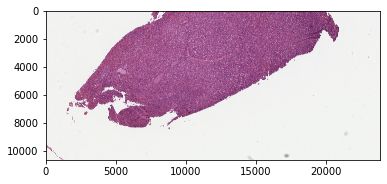

In [14]:
plt.imshow(img)

In [66]:
arr = np.array([[2000,5000],[200000,-3]])

In [67]:
flatten = lambda *n: (e for a in n
    for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,)))

In [70]:
tuple(flatten(tuple(flatten(tuple(arr)))))

(array([2000, 5000]), array([200000,     -3]))

In [76]:
tuple(flatten(tuple(arr.flatten())))


(2000, 5000, 200000, -3)